In [12]:
%matplotlib inline

# Chapter 12:  Implementing a Multilayer Artificial Neural Network from Scratch

Deep learning can be understood as a set of algorithms that were developed to train artificial neural networks with many layers most efficiently.

The topics covered in this chapter are as follows:

* Getting a conceptual understanding of multilayer neural networks.
* Implementing the fundamental backpropagation algorithm for neural network training from scratch.
* Training a basic multilayer neural network for image classification.

## Modeling complex functions with artificial neural networks

The basic concept behind artificial neural networks was built upon hypotheses and models of how the human brain works to solve complex problem tasks.

Deep learning algorithms and architectures are neural networks that are composed of many layers.

## Single-layer neural network recap

Let's briefly reiterate some of the concepts of single-layer neural networks that we introduced in Chapter 2, namely, the ADAptive LInear NEuron (Adaline) algorithm, which is shown in the following figure.

<img src="images/12_01.png" style="width:500px">

In every epoch (pass over the training set), we **updated** the weight vector $\mathbf{w}$ by using the following rule:

$$
\mathbf{w} := \mathbf{w} + \Delta\mathbf{w}
$$
where $\Delta\mathbf{w} = -\eta\nabla J(\mathbf{w})$.

In other words, we **computed** the gradient based on the whole training set and **updated the weights** of the model by taking a step into the opposite direction of the graidien $\nabla J(\mathbf{w})$.  In order to find the optimal weights of the model, we optimized an objective function that we defined as the **Sum of Squared Errors (SSE)** cost function $\nabla J(\mathbf{w})$.  Furthermore, we multiplied the gradient by a factor, the learning rate $\eta$, to balance the speed of learning against the risk of overshoothing the global minimum of the cost function.

In gradient descent optimisation, we updated all the weights simultaneously after each epoch, and we define the partial derivative for each weight $w_j$ in the weight vector $\mathbf{w}$ as follows

$$
\frac{\partial J(\mathbf{w})}{\partial w_j} = -\sum_i\left( y^{(i)} - a^{(i)} \right)x_j^{(i)}
$$

Here, $y^{(i)}$ is the target class label or a particular sample $x^{(i)}$, and $a^{(i)}$ is the activation of the neuron, whihc is a lienar function in the special case of Adaline.  Furthermore, we defined the activation function $\phi(\cdot)$ as follows

$$
\phi(z) = z = a
$$

Here, the net input is a linear combination of the weights that are connecting the input to the output layer:

$$
z = \sum_j w_jx_j = \mathbf{w}^T\mathbf{x}
$$

While we used the activation $\phi(z)$ to compute the gradient update, we implemented a threshold function to squash the continuous valued output into binary calss labels for prediction:

$$
\hat{y} = \begin{cases} 
      1 & \mathrm{if\ }g(z) \ge 0 \\
      -1 & \mathrm{otherwise} 
   \end{cases}
$$

Note that although Adaline consists of two layers, one input layer, and one output layer, it is called single-layer network because of its single link between the input and output layers.

We also learned about Stochastic Gradient Descent which approximates the cost from a single training sample (online learning), or a small subset of the training samples (mini-batch learning).

## Introducting the multi-layer neural network architecture.

A _fully-connected_ network is also called a **Multilayer Perceptron (MLP)**.  The following figure illustrates the concept of an MLP consisting of 3 layers:

<img src="images/12_02.png" style="width:500px">

If a network has more than one hidden layer, we call it a **deep artificial neural network.**

Note that special algorithms have been developed to help train deep neural network structures: this is known as deep learning.

As shown in the above figure, we denote the $i^{\mathrm{th}}$ activation unit in the $l^{\mathrm{th}}$ layer as $a_j^{(l)}$.

* $a_i^{(in)}$ refers to the $i^{\mathrm{th}}$ value in the input layer.
* $a_i^h$ refers to the $i^{\mathrm{th}}$ unit in the hidden layer.
* $a_i^{(out)}$ refers to the $i^{\mathrm{th}}$ unit in the output layer.
* Activation units $a_0^{(in)}$ and $a_o^{(h)}$ are the bias units, which we set equal to 1.

The activation of the units in the input layer is just its input plus the bias units:

$$
a^{(in)} = \begin{bmatrix}
a_0^{(in)} \\ a_1^{(in)} \\ \vdots \\ a_m^{(in)} \\
\end{bmatrix} = \begin{bmatrix}
1 \\ x_1^{(in)} \\ \vdots \\ x_m^{(in)} \\
\end{bmatrix}
$$

$w_{k,j}^{(l+1)}$ refers to the connection between the $k^{\mathrm{th}}$ unit in layer $l$ to the $j^{\mathrm{th}}$ unit in layer $(l + 1)$.

* $\mathbf{W}^{(h)}$ denotes the weight matrix that connects the input to the hidden layer.
* $\mathbf{W}^{(\mathrm{out})}$ is the weight matrix that connects the hidden layer to the output layer.

We saw a more general form of a neural network in the preceding figure, which allows us to perform multiclass classification via a generalsation of the **One-versus-All (OvA)** technique.

We summarise the weights that connect the input and hidden layers by a matrix $\mathbf{W}^{(h)}\in R^{m\times d}$, where $d$ is the number of hidden units, and $m$ is the number of input units including the bias unit.

Let's summarise what we have just learned in a descriptive illustration of a simpliefied 3-4-3 multilayer perceptron:

<img src="images/12_03.png" style="width:500px">

## Activating a neural network via forward propagation.

In this section, we will describe the process of **forward propagation** to calculate the output of an MLP model.  Let us summarise the MLP learning procedure in three simple steps:

1. Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output.
2. Based on the network's output, we calculate the error that we want to minimise using the cost function that we will describe alter.
3. We backpropagate the error, find its derivative with respect to each weight in the network, and update the model.

Finally, after we repeat these three steps for multiple epochs and learn the weights of the MLP, we use forward propagation to calculate the network output and apply a threshold function to obtain the predicted class labels in the one-hot representation.

Now, let's walk through the individual steps of forward propagation to generate an output from the patterns in the training data.  We first calculate the activation unit of the hidden layer $a_1^{(h)}$ as follows:

$$
z_1^{(h)} = a_0^{(in)}w_{0,1}^{(h)} + a_1^{(in)}w_{1,1}^{(h)} + \ldots + a_m^{(in)}w_{m,1}^{(h)}\\
a_1^{(h)} = \phi(z_1^{(h)})
$$

Here, $z_1^{(h)}$ is the net input, and $\phi(\cdot)$ is the activation function, which has to be differentiable to learn the weights that connect the neurons using a gradient-based approach.  To be able to solve complex problems such as image classification, we need non-linear activtion functions in our MLP model, for example, the sigmoid (logistic) activaiton function.  The sigmoid activation function is defined as follows:

$$
\phi(z) = \frac{1}{1 + e^{-z}}
$$

The sigmoid function, is an $S$-shaped curve that maps the net input $z$ onto a logistic distribution in the range of $[0, 1]$, which cuts the $y$-axis at $z = 0$, as shown in the following graph:
<img src="images/12_04.png" style="width:500px">

The term **feedforward** refers to the fact that each layer serves as the input to the next layer without loops.  Intuitively, we can think of the neurons in the MLP as logistic regression units that return values in the continuous range between 0 and 1.

Let us now write the activation in a more compact form using the cocepts of basic linear algebra:
$$
\mathbf{z}^{(h)} = \mathbf{a}^{(in)}\mathbf{W}^{(h)}\\
\mathbf{a}^{(h)} = \phi\left(\mathbf{z}^{(h)}\right)
$$

* $\mathbf{a}^{(in)}$ is our $1\times m$ dimensional feature vector of a sample $\mathbf{x}^{(in)}$ plus a bias unit.
* $\mathbf{W}^{(h)}$ is an $m\times d$ dimensional weight matrix where $d$ is the number of units in the hidden layer.

After matrix-vector multiplication, we obtain the $1\times d$ dimensional net input vector $\mathbf{z}^{(h)}$ to calculate the activation $\mathbf{a}^{(h)}$.  Furthermore, we generalise this computation to all the $n$ samples in the training set:
$$
\mathbf{Z}^{(h)} = \mathbf{A}^{(in)}\mathbf{W}^{(h)}
$$

* $\mathbf{A}^{(in)}$ is now an $n\times m$ matrix, and the matrix-matrix multiplication will result in an $n\times d$ dimensional net input matrix $\mathbf{Z}^{(h)}$.

Finally, we apply the activation function $\phi(\cdot)$ to each value in the net input matrix to get the $n\times d$ activation matrix $\mathbf{A}^{(h)}$ for the next layer (here, the output layer)

$$
\mathbf{A}^{(h)} = \phi\left( \mathbf{Z}^{(h)} \right)
$$

Similarly, we can write the activation of the output layer in vectorized form for multiple samples:

$$
\mathbf{Z}^{(out)} = \mathbf{A}^{(h)}\mathbf{W}^{(out)}
$$

here, we multiply the $d\times t$ matrix $\mathbf{W}^{(out)}$ (where $t$ is the number of output units) by the $n\times d$ dimensional matrix $\mathbf{A}^{(h)}$ to obtain the $n\times t$ dimensional matrix $\mathbf{Z}^{(out)}$ (the columns in this matrix represent the outputs for each sample).

Lastly, we apply the sigmoid activation function to obtain the continuous valued output of our network:

$$
\mathbf{A}^{(out)} = \phi\left( \mathbf{Z}^{(out)} \right)
$$
where $\mathbf{A}^{(out)} \in {\rm I\!R}^{n\times t}$

## Obtaining the MNIST dataset

The MNIST dataset is publicly availabel at <http://yann.lecun.com/exdb/mnist/> and consists of the following four parts.

* **Training set images** (60,000 samples)
* **Training set labels** (60,000 samples)
* **Test set images** (10,000 samples)
* **Test set labels** (10,000 labels)

After downloading the files, I recommend that you unzip the files using the Linux `gzip` tool from the Terminal for efficiency, using the following command in you local MNIST download directory:

`gzip *ubyte.gz -d`

The images are stored in byte format, and we will read them into NumPy arrays that wee will use to train and test our MLP implementation.  In order to do that, we will define the following helper function:

In [13]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, "{}-labels-idx1-ubyte".format(kind))
    images_path = os.path.join(path, "{}-images-idx3-ubyte".format(kind))
    
    with open(labels_path, "rb") as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - 0.5) * 2 # Standardise the images to have the range [-1, +1]
    
    return images, labels

The `load_mnist` function returns 2 arrays, the first being an $n\times m$ dimensional NumPy array (`images`), where $n$ is the number of samples and $m$ is the number of features (here, pixels).

We are going to unroll the $28\times 28$ pixels into one-dimensional row vectors, which represent the rows in our `images` array (784 per row or image).  The second array (`labels`) returned by the `load_mnist` function contains the corresponding target variable, the class labels (integers 0-9) of the handwritten digits.

```python
magic, n = struct.unpack('>II', lbpath.read(8))
labels = np.fromfile(lbpath, dtype=np.int8)
```
First, we read in the magic number, which is a description of the file protocol, and secondly, we read the number of items `n` from the file buffer before we read the following bytes into a NumPy array using the `fromfile` method.  The `fmt` parameter valoue `'>II'` that we passed as an argument to `struct.unpack` can be composed into the following two parts:
* `>`:  This is big-endian.  It defines the order in which a sequence of bytes is stored.
* `I`: This is an unsigned integer.

By executing the following code, we will now load the 60,000 training instances as well as the 10,000 test samples from the local directory:

In [14]:
X_train, y_train = load_mnist('', kind='train')
print("Rows: {}, Columns: {}".format(X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print("Rows: {}, Columns: {}".format(X_test.shape[0], X_test.shape[1]))

Rows: 60000, Columns: 784
Rows: 10000, Columns: 784


To get an idea of how those images in MNIST look, we show some plots via Matplotlib's `imshow` function:

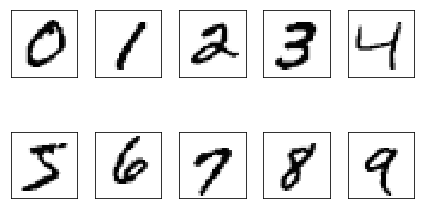

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In addition, let's also plot multiple examples of the same digit to see how different the handwriting really is:

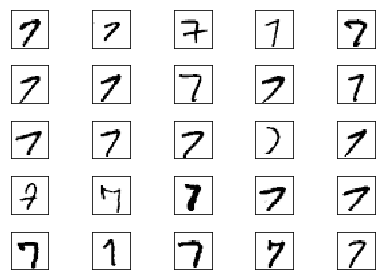

In [16]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap="Greys")
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

The `savez_compressed` further compresses the output file down to substantially smaller file sizes (approximagely 22 MB versus approximagely 400 MB in this case).  The following code snippet will save both the training and test datasets to the archive file `'mnist_scaled.npz'`

In [17]:
import numpy as np

np.savez_compressed('mnist_scaled.npz',
                   X_train=X_train,
                   y_train=y_train,
                   X_test=X_test,
                   y_test=y_test)

Now we can load the preprocessed MNIST image arrays using NumPy's `load` function as follows:
```python
mnist=np.load('mnist_scaled.npz')
```
The `mnist` variable now references to an object that can access the four data arrays, which can be listed under the files attribute list of the `mnist` object.

In [18]:
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

Using a list comprehension we can retrieve all four data arrays as follows:

In [19]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

The preceding `np.savez_compressed` and `np.load` examples are not essential for executing the code in this chapter, it servers as a demonstration of how to save and load NumPy arrays conveniently and efficiently.

## Implementing a multilayer perceptron

The following is the implementation of a multilayer perceptron:

In [20]:
import numpy as np
import sys


class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training samples per minibatch.
    seed : int (default: None)
        Random seed for initalizing weights and shuffling.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_samples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""

        # step 1: net input of hidden layer
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # step 2: activation of hidden layer
        a_h = self._sigmoid(z_h)

        # step 3: net input of output layer
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activation output layer
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_samples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_samples, n_output_units]
            Activation of the output layer (forward propagation)

        Returns
        ---------
        cost : float
            Regularized cost

        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term

        # If you are applying this cost function to other
        # datasets where activation
        # values maybe become more extreme (closer to zero or 1)
        # you may encounter "ZeroDivisionError"s due to numerical
        # instabilities in Python & NumPy for the current implementation.
        # I.e., the code tries to evaluate log(0), which is undefined.
        # To address this issue, you could add a small constant to the
        # activation values that are passed to the log function.
        #
        # For example:
        #
        # term1 = -y_enc * (np.log(output + 1e-5))
        # term2 = (1. - y_enc) * np.log(1. - output + 1e-5)

        return cost

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
            Predicted class labels.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.

        Parameters
        -----------
        X_train : array, shape = [n_samples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_samples]
            Target class labels.
        X_valid : array, shape = [n_samples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_samples]
            Sample labels for validation during training

        Returns:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        # weights for input -> hidden
        self.b_h = self.random.normal(loc=0.0, scale=0.1, size=self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        # weights for hidden -> output
        self.b_out = self.random.normal(loc=0.0, scale=0.1, size=n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_samples, n_classlabels]
                sigma_out = a_out - y_train_enc[batch_idx]

                # [n_samples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_samples, n_hidden]
                sigma_h = (np.dot(sigma_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_samples] dot [n_samples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)

                # [n_hidden, n_samples] dot [n_samples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h  # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluation
            #############

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

Let us now initialise a new 784-100-10 MLP--a neural network with 784 input units (`n_features`), 100 hidden units (`n_hidden`), and 10 output units (`n_output`):

In [21]:
nn = NeuralNetMLP(n_hidden=200,
                 l2=0.01,
                 epochs=200,
                 eta=0.0005,
                 minibatch_size=1000,
                 shuffle=True,
                 seed=1)

* `l2`: This is the $\lambda$ parameter for L2 regularization to decrease the degree of overfitting.
* `epochs`: This is the number of passes over the training set.
* `eta`: This is the learning rate $\eta$.
* `shuffle`: This is for shuffling the training set prior to every epoch to prevent that the algorithms gets stuck in circles.
* `seed`: This is a random seed for shuffling and weight initialisation.
* `minibatch_size`: This is the number of trainig samples in each mini-batch when splitting of the training data in each epoch for stochastic gradient descent.  The gradient is computed for each mini-batch separately instead of the entire training data for faster learning.

Next, we train the MLP using 55,000 samples from the already shuffled MNIST training dataset and use the remaining 5,000 samples for validation during training.

We implemented the `fit` method so that it takes four input arguments: traiing images, training labels, validation images, and validation labels.  In neural network training, it is really useful to already compare training and validation accuracy during training, which helps us judge whether the network model performs well, given the architecture and hyperparameters.

To start the training, we execute the following code:

In [22]:
nn.fit(X_train=X_train[:55000],
      y_train=y_train[:55000],
      X_valid=X_train[55000:],
      y_valid=y_train[55000:])

200/200 | Cost: 2891.60 | Train/Valid Acc.: 99.71%/98.14%  

We also defined an `eval_` attribute that collects the cost, training, and validation accuracy for each epoch so that we can visualise the results using Matplotlib:

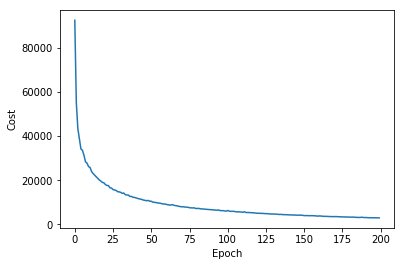

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

The preceding code plots the cost over the 200 epochs, as shown in the above figure.

As we can see, the cost decreased substantially during the first 100 epochs and seems to slowly converge in the last 100 epochs.  However, the small slope between epoch 175 and epoch 200 indicates that the cost would further dcrease with training over additional epochs.

In [24]:
print(nn.eval_['cost'][-1])

2891.5995001586784


Next, let us have a look at the training and validation accuracy as a function of Epoch.

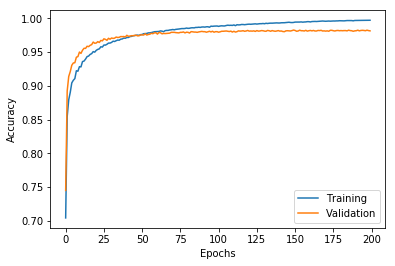

In [26]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='Training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

The preceding code examples plot the accuracy values over the 200 training epochs, as shown in the figure above.  The plot reveals that the gap between training and validation accuracy increases the more epochs we train the network.  At approximately the 50th epoch, the training and validation accuracy values are equal, and then, the network starts overfitting the training data.

One way to decrease the effects of overfitting is to increase the regularization strenght---for example, but setting `l2=0.1`.  Another useful technique to tackle overfitting in neural networks, is dropout, which will be coverewd in Chapter 15.

In [27]:
print(nn.eval_['train_acc'][-1])
print(nn.eval_['valid_acc'][-1])

0.997109090909091
0.9814


Finally, let us evaluate the generalisation performance of the model by calculating the prediction accuracy on the test set:

In [29]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])
print('Training Accuracy: {:.2f}.'.format(acc*100))

Training Accuracy: 97.88.


To further fine-tune the model, we could change the number of hidden units, values of the regularization strength, and the learning rate.

Lastly, let us take a look at some of the images that our MLP struggles with.

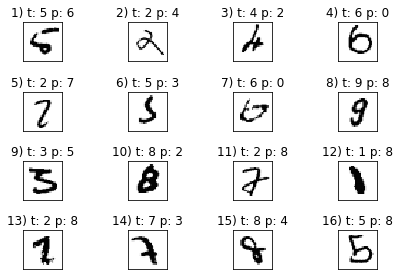

In [31]:
miscl_img = X_test[y_test != y_test_pred][:16]
correct_lab = y_test[y_test != y_test_pred][:16]
miscl_lab = y_test_pred[y_test != y_test_pred][:16]

fig, ax = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(16):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap="Greys", interpolation="nearest")
    ax[i].set_title("{:.0f}) t: {:.0f} p: {:.0f}".format(i+1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

The first number in the subtitles indicate the plot index, the second number represents the true class label (`t`), and the third number stands for the predicted class label (`p`).

As we can see in the preceding figure, some of those images are even challenging for us humans to classify correctly.

## Training an artificial neural network.



The logistic cost function is defined as:

$$
J(\mathbf{w}) = -\left[\sum_{i=1}^n y^{(i)}\log\left( a^{(i)} \right) + \left( 1 - y^{(i)} \right)\log\left( 1 - a^{(i)} \right)\right]
$$

Here, $a^{(i)}$ is the sigmoid activation of the $i^{\mathrm{th}}$ sample in the dataset.  The superscript $i$ is an index for training samples, not layers.

The L2 regularization term is defined as follows (keeping in mind that we do not regularise the bias units):

$$
L2 = \frac{\lambda}{2}\left\lVert\mathbf{w}\right\rVert_2^2 = \frac{\lambda}{2}\sum_{j=1}^m w_j^2
$$

By adding the L2 regularisation term to our logistic cost function, we obtain the following equation:
$$
J(\mathbf{w}) = -\left[\sum_{i=1}^n y^{(i)}\log\left( a^{(i)} \right) + \left( 1 - y^{(i)} \right)\log\left( 1 - a^{(i)} \right)\right] + \frac{\lambda}{2}\left\lVert\mathbf{w}\right\rVert_2^2
$$

Now, we need to generalise the logistic cost function to all the $t$ activation units in our network.
$$
J(\mathbf{W}) = -\left[ \sum_{i=1}^n\sum_{j=1}^t y_j^{(i)}\log\left( a_j^{(i)} \right) + \left( 1 - y_j^{(i)}\right) \log\left( 1 - a_j^{(i)} \right) \right]
$$

Furthermore, the generalised regularisation term is the sum of all the squares of all the weights of an $l$ layer:
$$
L2 = \frac{\lambda}{2}\sum_{i=1}^{u_l}\sum_{j=1}^{u_{l+1}}\left( w_{j,i}^{(l)} \right)^2
$$
where $u_l$ refers to the number of units in a given layer $l$.

Remember that our goal is to minimise the cost function $J\left( \mathbf{W} \right)$, and thus we need to calculate the partial derivative of the parameters of $\mathbf{W}$ with respect to each weight for every layer in the network:

$$
\frac{\partial}{\partial w_{j,i}^{(l)}}J\left( \mathbf{W} \right)
$$

Notice that $\mathbf{W}$ consists of multiple matrices.  An intuitive visualisation of the 3D tensor $\mathbf{W}$ is provided in the following figure:

<img src="images/12_10.png" style="width:500px">

In this simplified figure, it may seem that both $\mathbf{W}^{(h)}$ and $\mathbf{W}^{(out)}$ have the same number of rows and columns, which is typically not the case unless we initialise an MLP with the same number of hidden units, output units, and input features.

## Developing your intuition for backpropagation.

In essence, we can think of backpropagation as a very computationally efficient approach to compute the partial derivatives of a complex cost function in Multilayer Neural Networks

## Training neural networks via backpropagation

In backpropagation, we propagate the error from right to left.  We start by calculating the error vector of the output layer:
$$
\mathbf{\delta}^{(out)} = \mathbf{a}^{(out)} - \mathbf{y}
$$
Here, $\mathbf{y}$ is the vector of the true class labels.

Next, we calculate the error term of the hidden layer:
$$
\mathbf{\delta}^{(h)} = \mathbf{\delta}^{(out)}\left( \mathbf{W}^{(out)} \right)^T\odot\frac{\partial \phi\left( z^{(h)} \right)}{\partial z^{(h)}}
$$

Here, $\frac{\partial \phi\left( z^{(h)} \right)}{\partial z^{(h)}}$ is simply the derivative of the sigmoid activation function, which is computed to be:
$$
\frac{\partial \phi\left( z^{(h)} \right)}{\partial z^{(h)}} = \left[ a^{(h)}\odot\left( 1 - a^{(h)} \right) \right]
$$

Note that the $\odot$ symbol means element-wise multiplication in this context (also known as the Hadamard product).

Next, we can write the derivate of the cost function in the following vectorised version:
$$
\Delta^{(h)} = \left( \mathbf{A}^{(in)} \right)^T\delta^{(h)}\\
\Delta^{(out)} = \left( \mathbf{A}^{(h)}\right)^T\delta^{(out)}\\
$$

After we have accumulated the partial derivatives, we can add the regularisation term:
$$
\Delta^{(l)} := \Delta^{(l)} + \lambda\mathbf{W}^{l}
$$

Last, after we have computed the gradients, we can now update the weights by taking an opposite step towards the gradient for each layer $l$:
$$
\mathbf{W}^{(l)} := \mathbf{W}^{(l)} - \eta\Delta^{(l)}
$$

Let us summarise backpropagation in the following figure:
<img src="images/12_12.png" style="width:500px">

## About the Convergenc in Neural Networks

Mini-batch learning is a special form of stochastic graient descent where we compute the gradient based on a subset $k$ of the $n$ training samples with $1 < k < n$.  We can update the weights much faster than in regular gradient descent.

In reality, the output function of multilayer neural networks has a rough surface and the optimisation algorithm can easily become trapped in local minima as shown in the following figure:
<img src="images/12_13.png" style="width:500px">

By increasing the learning rate, $\eta$, we can more readily escape such local minima.  On the other hand, we also increase the chance of overshooting the global optimum if the learning rate is too large.

## Summary

In the remaining chapters, we will introduce TensorFlow, an open source library geared towards deep learning, which allows us to implement and train multilayer neutral networks more efficiently.